In [1]:
import pandas as pd
from textblob import TextBlob
import re
df = pd.read_csv("comments.csv")


In [2]:
df.shape

(501, 4)

In [3]:
df['Date'][0]

'Posted by the Environmental Protection Agency on Feb 19, 2025'

In [4]:
df.shape

(501, 4)

In [12]:
pip install contractions


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
import contractions

def textblob_sentiment_analysis(row):
    text = row['Text']
    text = text.strip()
    text = re.sub(r"(?i)thank you[,\s]*.*", "", text)
    text = contractions.fix(text)
    row['cleaned_message'] = text
    blob = TextBlob(text)
    row['polarity'] = blob.sentiment.polarity
    row['subjectivity'] = blob.sentiment.subjectivity
    return row

df_cleaned = df.copy()
df_cleaned= df_cleaned.apply(textblob_sentiment_analysis, axis=1)

In [10]:
df_cleaned['cleaned_message']

0      I don't know what to comment, other than any e...
1      Please stop this reckless doubling down on sev...
2      Please protect our people from harmful pestici...
3      As a farmer from Arkansas, I'm sad my state's ...
4      The EPA was created to protect Americans. Clea...
                             ...                        
496    As a concerned citizen, I expect you to reject...
497    I am writing as a retired family physician and...
498    Please protect state and local government righ...
499    We often know more about our communities than ...
500    There are so many acres of land that have beco...
Name: cleaned_message, Length: 501, dtype: object

0.05190549558823545
0.11538851164002784


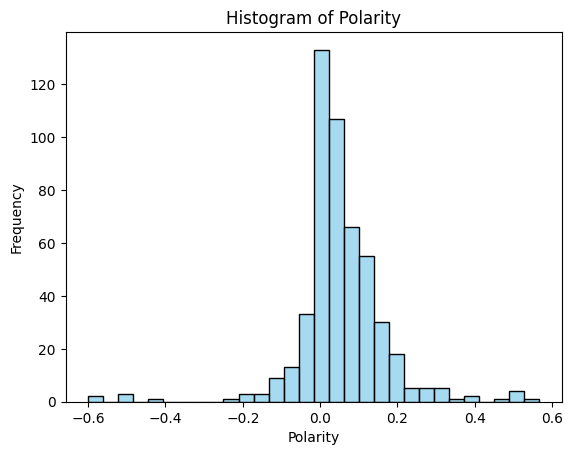

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram plot
sns.histplot(df_cleaned['polarity'], bins=30, kde=False, color='skyblue')

# Print the mean
print(df_cleaned['polarity'].mean())
print(df_cleaned['polarity'].std())


# Plot formatting
plt.title('Histogram of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

In [16]:
from scipy import stats

t_stat, p_value = stats.ttest_1samp(df_cleaned['polarity'], 0)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 10.068612648886957
p-value: 7.771037751028811e-22


In [20]:
from scipy import stats

t_stat, p_value = stats.ttest_1samp(df_cleaned['subjectivity'], 0)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 62.51392941202028
p-value: 1.8221664290218335e-238


In [17]:
df_cleaned.to_csv("analyzed.csv")

0.052921887174810195


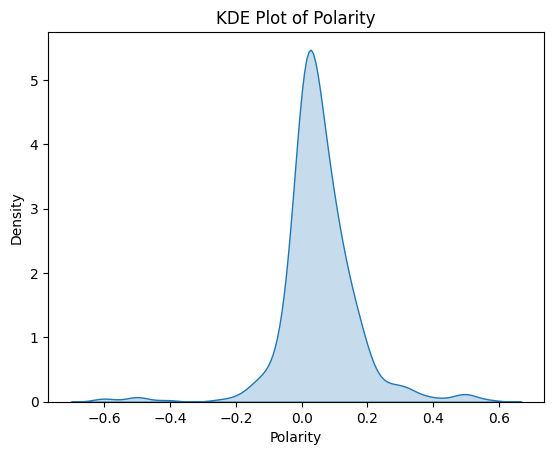

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# KDE plot
sns.kdeplot(df_cleaned['polarity'], fill=True)

# Print the mean
print(df_cleaned['polarity'].mean())
# plt.xlim(0,1)
# Show the plot
plt.title('KDE Plot of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.show()

0.392658893789375


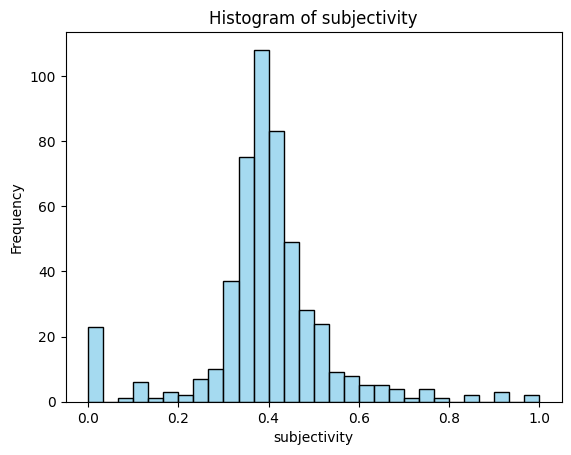

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram plot
sns.histplot(df_cleaned['polarity'], bins=30, kde=False, color='skyblue')

# Plot formatting
plt.title('Histogram of subjectivity')
plt.xlabel('subjectivity')
plt.ylabel('Frequency')
plt.show()

0.392658893789375
0.14059099470475292


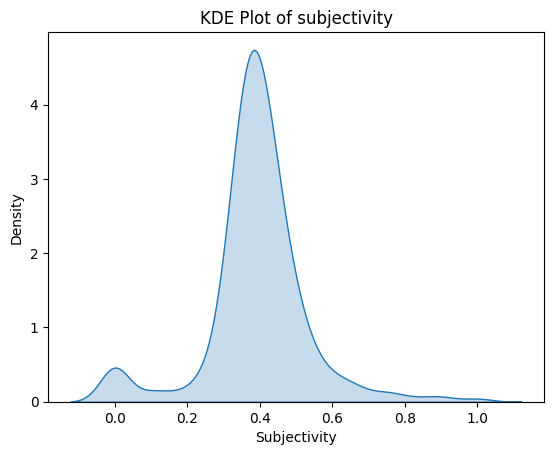

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# KDE plot
sns.kdeplot(df_cleaned['subjectivity'], fill=True)

# Print the mean
print(df_cleaned['subjectivity'].mean())
print(df_cleaned['subjectivity'].std())

# Show the plot
plt.title('KDE Plot of subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Density')
plt.show()

Text(0.5, 1.0, 'Subjectivity vs Polarity of comments')

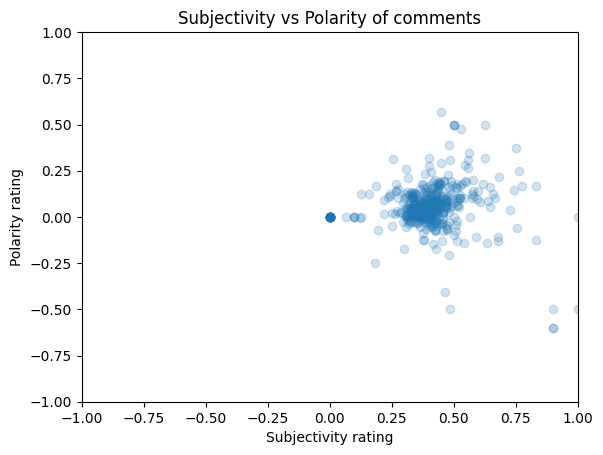

In [33]:
plt.scatter(x = df_cleaned['subjectivity'], y = df_cleaned['polarity'], alpha = 0.2)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Subjectivity rating')
plt.ylabel('Polarity rating')
plt.title("Subjectivity vs Polarity of comments")

In [6]:
# Extract the actual date using a better regex
df_cleaned['parsed_date'] = df_cleaned['Date'].str.extract(r'on (\w+ \d{1,2}, \d{4})')[0]

# Convert to datetime
df_cleaned['parsed_date'] = pd.to_datetime(df_cleaned['parsed_date'], errors='coerce')

# Drop or check any rows where parsing failed
print("Rows with unparsed dates:", df_cleaned['parsed_date'].isna().sum())

# Optional: drop rows with failed parsing
df_cleaned = df_cleaned.dropna(subset=['parsed_date'])

# Sort by date
df_cleaned = df_cleaned.sort_values('parsed_date')


Rows with unparsed dates: 0


In [7]:
df_cleaned['parsed_date'].unique()

<DatetimeArray>
['2025-01-24 00:00:00', '2025-02-04 00:00:00', '2025-02-07 00:00:00',
 '2025-02-12 00:00:00', '2025-02-13 00:00:00', '2025-02-14 00:00:00',
 '2025-02-18 00:00:00', '2025-02-19 00:00:00']
Length: 8, dtype: datetime64[ns]

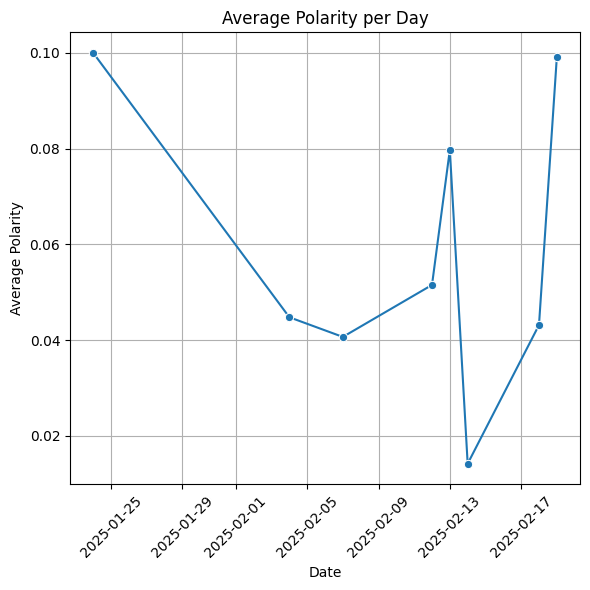

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by day
daily_avg = df_cleaned.groupby(df_cleaned['parsed_date'].dt.date)['polarity'].mean()

# Plot
plt.figure(figsize=(6, 6))
sns.lineplot(x=daily_avg.index, y=daily_avg.values, marker='o')

# Formatting
plt.title('Average Polarity per Day')
plt.xlabel('Date')
plt.ylabel('Average Polarity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

df['cleaned_text'] = df['Text'].apply(preprocess_text)

Topic #0:
health chemicals people pesticides products companies safe protect food epa
Topic #1:
local pesticides state protect laws pesticide toxic urge regulations children
Topic #2:
pesticide epa local states federal health petition state public pesticides
Coherence for 2 topics: -0.3288
Coherence for 3 topics: -0.5170
Coherence for 4 topics: -0.6032
Coherence for 5 topics: -0.8058
Coherence for 6 topics: -1.2192
Coherence for 7 topics: -1.7110
Coherence for 8 topics: -1.4379


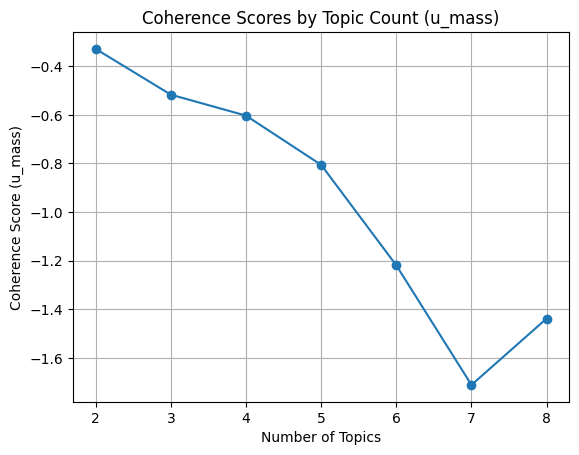

In [47]:
from gensim.models import CoherenceModel, LdaModel
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from gensim import corpora

# === Step 1: Vectorize for sklearn LDA ===
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['cleaned_text'])
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

feature_names = vectorizer.get_feature_names_out()

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, feature_names, 10)

# === Step 2: Prepare data for gensim coherence scoring ===
texts = [text.split() for text in df['cleaned_text']]  # tokenize cleaned text
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# === Step 3: Compute u_mass coherence for multiple topic numbers ===
coherence_scores = []
topic_range = range(2, 9)  # Try from 2 to 8 topics

for num_topics in topic_range:
    gensim_lda = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        passes=10,
        random_state=42
    )
    coherence_model = CoherenceModel(model=gensim_lda, texts=texts, dictionary=dictionary, coherence='u_mass')
    coherence = coherence_model.get_coherence()
    coherence_scores.append(coherence)
    print(f'Coherence for {num_topics} topics: {coherence:.4f}')

# === Step 4: Plot coherence scores ===
plt.plot(topic_range, coherence_scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (u_mass)")
plt.title("Coherence Scores by Topic Count (u_mass)")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['cleaned_text'])
lda = LatentDirichletAllocation(n_components=4)
lda.fit(X)

feature_names = vectorizer.get_feature_names_out()

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, feature_names, 10)

LatentDirichletAllocation(n_components=4)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)


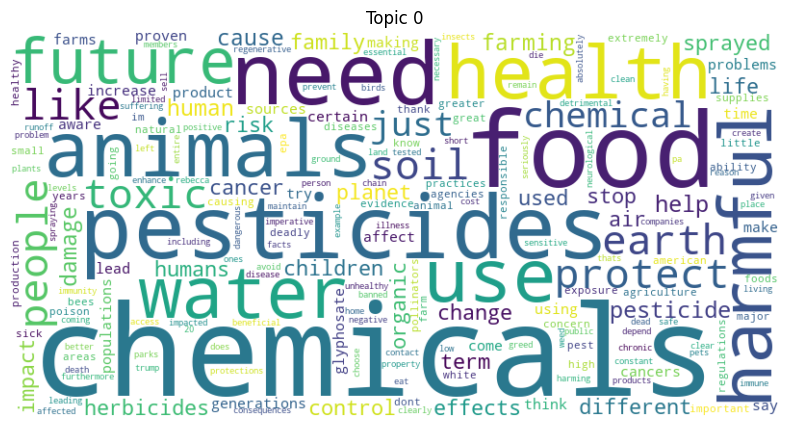

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)


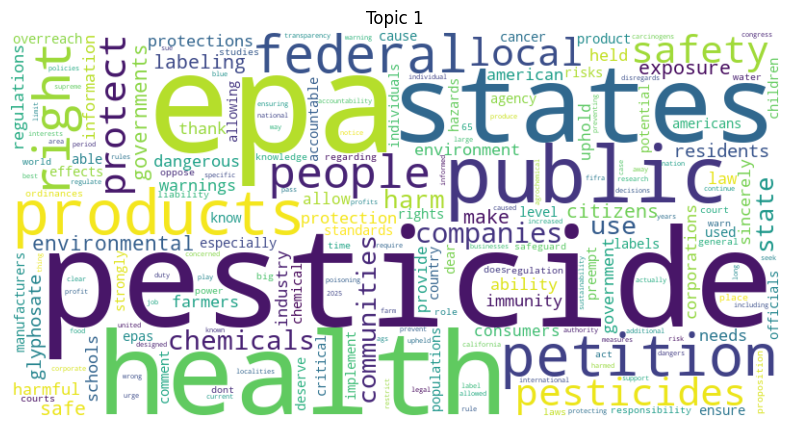

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)


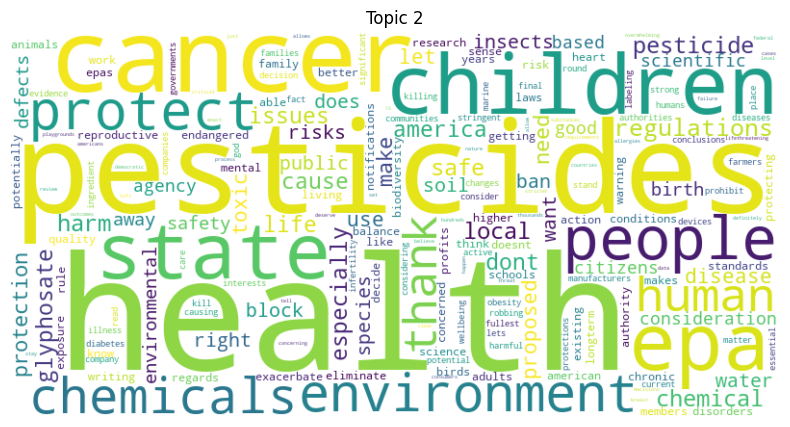

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)


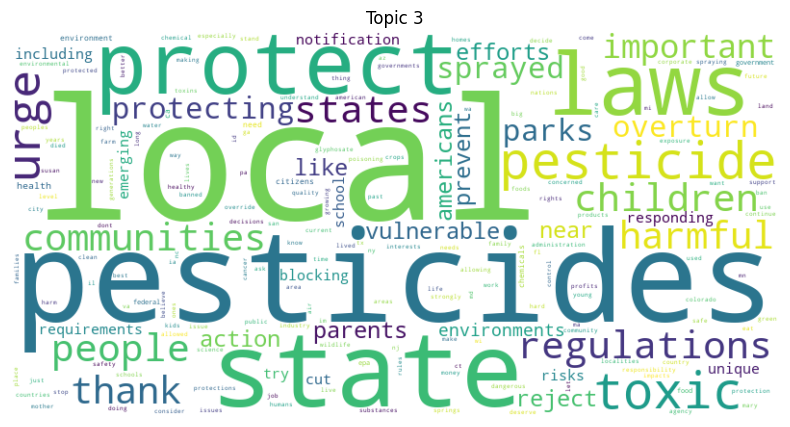

In [41]:
from wordcloud import WordCloud

# Get words for each topic from the LDA model
for i, topic in enumerate(lda.components_):
    # Create a word cloud for each topic
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(vectorizer.get_feature_names_out(), topic)))
    plt.figure(figsize=(10, 5))
    plt.title(f'Topic {i}')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
df[]

,Unnamed: 0,ID,Date,Text,cleaned_text
0,0,EPA-HQ-OPP-2024-0562-0501,Posted by the Environmental Protection Agency ...,"I don't know what to comment, other than any e...",i dont know what to comment other than any ent...
1,1,EPA-HQ-OPP-2024-0562-0504,Posted by the Environmental Protection Agency ...,Please stop this reckless doubling down on sev...,please stop this reckless doubling down on sev...
2,2,EPA-HQ-OPP-2024-0562-0503,Posted by the Environmental Protection Agency ...,Please protect our people from harmful pestici...,please protect our people from harmful pestici...
3,3,EPA-HQ-OPP-2024-0562-0502,Posted by the Environmental Protection Agency ...,"As a farmer from Arkansas, I'm sad my state's ...",as a farmer from arkansas im sad my states att...
4,4,EPA-HQ-OPP-2024-0562-0478,Posted by the Environmental Protection Agency ...,The EPA was created to protect Americans. Clea...,the epa was created to protect americans clear...
...,...,...,...,...,...
496,496,EPA-HQ-OPP-2024-0562-0009,Posted by the Environmental Protection Agency ...,"As a concerned citizen, I expect you to reject...",as a concerned citizen i expect you to reject ...
497,497,EPA-HQ-OPP-2024-0562-0039,Posted by the Environmental Protection Agency ...,I am writing as a retired family physician and...,i am writing as a retired family physician and...
498,498,EPA-HQ-OPP-2024-0562-0026,Posted by the Environmental Protection Agency ...,Please protect state and local government righ...,please protect state and local government righ...
499,499,EPA-HQ-OPP-2024-0562-0044,Posted by the Environmental Protection Agency ...,We often know more about our communities than ...,we often know more about our communities than ...


In [46]:
import re
# Remove punctuation
df['text_processed'] = df['Text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['text_processed'] = df['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['text_processed'].head()

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/var/folders/xj/3_cf3p513dxgf8tbpc4j_1j40000gn/T/ipykernel_58601/2840199425.py:3: SyntaxWarning: invalid escape sequence '\.'
  df['text_processed'] = df['Text'].map(lambda x: re.sub('[,\.!?]', '', x))


0    i don't know what to comment other than any en...
1    please stop this reckless doubling down on sev...
2    please protect our people from harmful pestici...
3    as a farmer from arkansas i'm sad my state's a...
4    the epa was created to protect americans clear...
Name: text_processed, dtype: object

In [47]:
pip install wordcloud

Python(61238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=58601) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


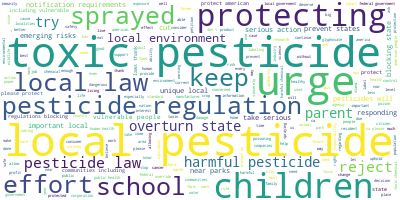

In [48]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()